In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Мы будем работать с данными агрегатора такси [Sigma Cabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). В зависимости от характеристик поездки требуется предсказать один из трех типов повышенного ценообразования: [1, 2, 3]. Таким образом, это поможет компании оптимально мэтчить такси и клиентов. 

In [61]:
df = pd.read_csv('C:/Users/maslo/Desktop/karpov_start_ml/2_module/14_lesson/materials/sigma_cabs.csv')
df.shape

(131662, 14)

In [62]:
# Занесем индекс колонку
df = df.set_index('Trip_ID')
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


Описание признаков:

1. **Trip_ID**: ID for TRIP
2. **Trip_Distance**: The distance for the trip requested by the customer
3. **TypeofCab**: Category of the cab requested by the customer
4. **CustomerSinceMonths**: Customer using cab services since n months; 0 month means current month
5. **LifeStyleIndex**: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
6. **ConfidenceLifeStyle_Index**: Category showing confidence on the index mentioned above
7. **Destination_Type**: Sigma Cabs divides any destination in one of the 14 categories.
8. **Customer_Rating**: Average of life time ratings of the customer till date
9. **CancellationLast1Month**: Number of trips cancelled by the customer in last 1 month
10. **Var1**, **Var2** and **Var3**: Continuous variables masked by the company. Can be used for modelling purposes
11. **Gender**: Gender of the customer

**SurgePricingType**: Target (can be of 3 types)


### EDA 
Заполните пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом. Изобразите марицу корреляций и выведите топ5 пар самых коррелированных признаков.

Так как в сумме уникальных значений различных категориальных признаков окажется не супер-много, примените `One-Hot-Encoding` для них. Не забудьте в методе `pd.get_dummies` указать параметр `drop_first=True`.

In [63]:
len(df)

131662

In [64]:
df.select_dtypes(include='float64').isna().sum()

Trip_Distance                0
Customer_Since_Months     5920
Life_Style_Index         20193
Customer_Rating              0
Var1                     71030
dtype: int64

In [65]:
df['Customer_Since_Months'] = df['Customer_Since_Months'].fillna(df['Customer_Since_Months'].median())

In [66]:
df['Life_Style_Index'] = df['Life_Style_Index'].fillna(df['Life_Style_Index'].median())

In [67]:
df['Var1'] = df['Var1'].fillna(df['Var1'].median())

In [68]:
df.select_dtypes(include='object').isna().sum()

Type_of_Cab                    20210
Confidence_Life_Style_Index    20193
Destination_Type                   0
Gender                             0
dtype: int64

In [69]:
df['Type_of_Cab'] = df['Type_of_Cab'].fillna(df['Type_of_Cab'].value_counts().head(1).index[0])

In [70]:
df['Confidence_Life_Style_Index'] = df['Confidence_Life_Style_Index'].fillna(df['Confidence_Life_Style_Index'].value_counts().head(1).index[0])

In [71]:
corrs = pd.DataFrame(df.corr().abs().unstack(), columns=['corr_val']).reset_index()

In [72]:
corrs[
    corrs['level_0'] != corrs['level_1']
].sort_values(by='corr_val', ascending=False)

,level_0,level_1,corr_val
61,Var2,Var3,0.683437
69,Var3,Var2,0.683437
18,Life_Style_Index,Trip_Distance,0.468332
2,Trip_Distance,Life_Style_Index,0.468332
65,Var3,Life_Style_Index,0.303324
...,...,...,...
31,Customer_Rating,Cancellation_Last_1Month,0.003595
62,Var2,Surge_Pricing_Type,0.003437
78,Surge_Pricing_Type,Var2,0.003437
14,Customer_Since_Months,Var1,0.000977


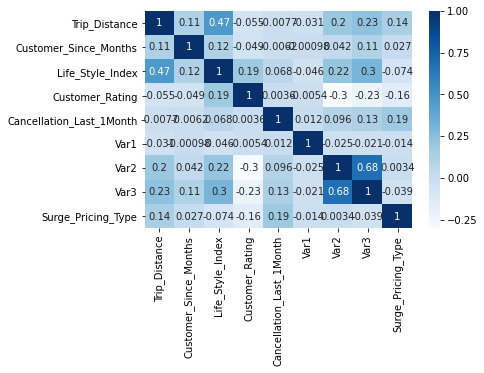

In [73]:
import seaborn as sb
sb.heatmap(df.corr(), cmap="Blues", annot=True)

In [74]:
df.select_dtypes(include='object').isna().sum()

Type_of_Cab                    0
Confidence_Life_Style_Index    0
Destination_Type               0
Gender                         0
dtype: int64

In [75]:
df.select_dtypes(include='object')

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
Trip_ID,,,,
T0005689460,B,A,A,Female
T0005689461,B,B,A,Male
T0005689464,B,B,E,Male
T0005689465,C,B,A,Male
T0005689467,C,B,A,Male
...,...,...,...,...
T0005908509,D,A,A,Male
T0005908510,C,C,A,Male
T0005908512,C,B,A,Female


In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
for column in list(df.select_dtypes(include='object').columns):
    encoder = OneHotEncoder(drop='first')
    encoder.fit(df[[column]])
    encoded_data = encoder.transform(df[[column]]).toarray()
    col_names = [column + value for value in encoder.get_feature_names_out([column])]
    encoded_data = pd.DataFrame(encoded_data,
                                columns=col_names,
                                index = df.index)
    df = pd.concat([df, encoded_data], axis=1)

In [78]:
len(df)

131662

In [79]:
df

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,...,Destination_TypeDestination_Type_F,Destination_TypeDestination_Type_G,Destination_TypeDestination_Type_H,Destination_TypeDestination_Type_I,Destination_TypeDestination_Type_J,Destination_TypeDestination_Type_K,Destination_TypeDestination_Type_L,Destination_TypeDestination_Type_M,Destination_TypeDestination_Type_N,GenderGender_Male
Trip_ID,,,,,,,,,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
T0005689464,41.58,B,10.0,2.79805,B,E,3.50125,2,61.0,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
T0005689465,61.56,C,10.0,2.79805,B,A,3.45375,0,61.0,52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,61.0,63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,61.0,48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Training

In [80]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [81]:
df['Surge_Pricing_Type'].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [82]:
X = df.drop(['Surge_Pricing_Type', 'Confidence_Life_Style_Index', 'Type_of_Cab', 'Destination_Type', 'Gender'], axis=1)
y = df['Surge_Pricing_Type']

In [83]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

**Задание 1.** Обучите One-vs-Rest Logreg. Не забудьте в шаг добавить стандартизацию данных (через `StandardScaler`) Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg. Здесь и далее округляйте до 3 знака после запятой.

Чтобы отдельно и долго не вычислять метрики, можно воспользоваться `classification_report` из `sklearn.metrics`!

In [84]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('scaler', StandardScaler()), ('one_vs_all', OneVsRestClassifier(estimator=LogisticRegression()))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_all',
                 OneVsRestClassifier(estimator=LogisticRegression()))])

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test, pipe.predict(X_test), target_names=['1', '2', '3'], digits=3))

              precision    recall  f1-score   support

           1      0.723     0.542     0.619      5372
           2      0.636     0.834     0.722     11349
           3      0.741     0.571     0.645      9612

    accuracy                          0.679     26333
   macro avg      0.700     0.649     0.662     26333
weighted avg      0.692     0.679     0.673     26333



In [87]:
from sklearn.metrics import multilabel_confusion_matrix

In [88]:
multilabel_confusion_matrix(y_test, pipe.predict(X_test))

array([[[19843,  1118],
        [ 2461,  2911]],

       [[ 9555,  5429],
        [ 1880,  9469]],

       [[14802,  1919],
        [ 4125,  5487]]], dtype=int64)

In [89]:
# tp / (tp + fn)
19843 / (19843 + 1118)

0.9466628500548638

Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()` из предложенных. Для лучшего набора гиперпараметров посчитайте те же самые метрики. Валидировать параметры необходимо по `accuracy`. В этот раз проведем настояющую процедуру Кросс-Валидации! 

Для этого в метод `fit` передадим тренировочную часть наших данных, в параметр `cv` ничего не будем передавать (по дефолту 5-fold Кросс-Валидация будет проведена), а итоговые метрики замерим на тесте!

In [90]:
param_grid = {'one_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],
              'one_vs_all__estimator__C': [0.001, 0.01, 0.1, 1]}

In [91]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(pipe, param_grid)

In [92]:
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('one_vs_all',
                                        OneVsRestClassifier(estimator=LogisticRegression()))]),
             param_grid={'one_vs_all__estimator__C': [0.001, 0.01, 0.1, 1],
                         'one_vs_all__estimator__penalty': ['l1', 'l2',
                                                            'elasticnet']})

In [93]:
search.best_score_

0.6806197879917104

In [94]:
search.best_params_

{'one_vs_all__estimator__C': 0.001, 'one_vs_all__estimator__penalty': 'l2'}

In [95]:
pipe = Pipeline([('scaler', StandardScaler()), ('one_vs_all', OneVsRestClassifier(estimator=LogisticRegression(C=0.001, penalty='l2')))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_all',
                 OneVsRestClassifier(estimator=LogisticRegression(C=0.001)))])

In [96]:
print(classification_report(y_test, pipe.predict(X_test), target_names=['1', '2', '3'], digits=3))

              precision    recall  f1-score   support

           1      0.742     0.534     0.621      5372
           2      0.635     0.839     0.723     11349
           3      0.742     0.576     0.649      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.664     26333
weighted avg      0.696     0.681     0.675     26333



Изобразите три калибровочные кривые для Logistic Classifier: 0-vs-rest, 1-vs-rest, 2-vs-rest. Хорошо ли откалиброван обученный классификатор? 

Заметьте, что `predict_proba` возвращает список из вероятностей для всех наших классов!

In [97]:
from sklearn.calibration import CalibrationDisplay

In [98]:
y_test.value_counts()

2    11349
3     9612
1     5372
Name: Surge_Pricing_Type, dtype: int64

In [99]:
y_test.replace(1, 0).replace(3, 0).replace(2, 1)

Trip_ID
T0005828439    1
T0005867265    1
T0005837398    0
T0005888871    1
T0005859728    0
              ..
T0005860557    0
T0005818708    0
T0005896460    0
T0005898831    0
T0005709930    0
Name: Surge_Pricing_Type, Length: 26333, dtype: int64

In [100]:
pipe.predict_proba(X_test)[:, 1:2]

array([[0.27486411],
       [0.5404543 ],
       [0.55678486],
       ...,
       [0.10505849],
       [0.18013107],
       [0.59998973]])

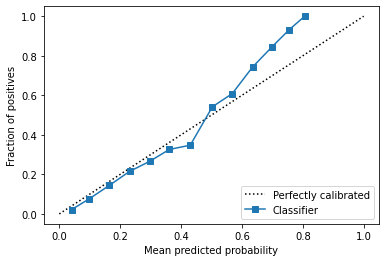

In [101]:
CalibrationDisplay.from_predictions(y_test.replace(2, 0).replace(3, 0), 
                                    pd.DataFrame(pipe.predict_proba(X_test)[:, :1]),
                                    n_bins=15)

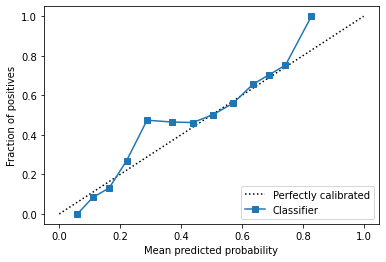

In [102]:
CalibrationDisplay.from_predictions(y_test.replace(1, 0).replace(3, 0).replace(2, 1), 
                                    pd.DataFrame(pipe.predict_proba(X_test)[:, 1:2]),
                                    n_bins=15)

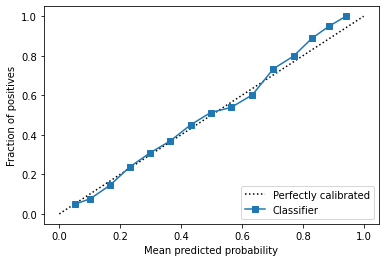

In [103]:
CalibrationDisplay.from_predictions(y_test.replace(1, 0).replace(2, 0).replace(3, 1), 
                                    pd.DataFrame(pipe.predict_proba(X_test)[:, 2:3]),
                                    n_bins=15)

**Задание 2.** Обучите логистическую регрессию с гиперпараметрами из первого задания на полиномиальных признаках до 4 степени. Сравните метрики с первым заданием.


Пример: Пусть у нас был единственный признак 

$$
d_j = [1, 2, 3, 4]
$$

Тогда полиномиальные признаки до 4 степени от такого будут иметь вид:

$$
d_j^1 = [1, 2, 3, 4]
$$

$$
d_j^2 = [1, 4, 9, 16]
$$

$$
d_j^3 = [1, 8, 27, 64]
$$

$$
d_j^4 = [1, 16, 81, 256]
$$

P.S. Бинарные колонки нет смысла возводить в какие-то степени, поэтому возьмем исключительно вещественные из базовых. 

Для этого можно воспользоваться классическим циклом (или уроком из занятия про `Sberbank Housing Market`). Положите модифицированный датасет в переменную `X_polinomial`!

P.S.S Зачастую еще, создаваю полиномиальные фичи, учитывают "пересечения" признаков, то есть, например, из векторов признаков $d_j, d_i$ генерируют не просто новые степени $d_j^2, d_i^2, d_j^3, d_i^3...$, а еще и признаки вида $d_j \cdot d_i, d_j^2 \cdot d_i, d_j \cdot d_i^2...$, но здесь ограничьтесь просто степенями!

In [104]:
X.dtypes

Trip_Distance                                               float64
Customer_Since_Months                                       float64
Life_Style_Index                                            float64
Customer_Rating                                             float64
Cancellation_Last_1Month                                      int64
Var1                                                        float64
Var2                                                          int64
Var3                                                          int64
Type_of_CabType_of_Cab_B                                    float64
Type_of_CabType_of_Cab_C                                    float64
Type_of_CabType_of_Cab_D                                    float64
Type_of_CabType_of_Cab_E                                    float64
Confidence_Life_Style_IndexConfidence_Life_Style_Index_B    float64
Confidence_Life_Style_IndexConfidence_Life_Style_Index_C    float64
Destination_TypeDestination_Type_B              

In [105]:
X_polinomial = X.copy()

In [106]:
for column in ['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index', 
               'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3']:
    for i in range(2,5):
        X_polinomial[f'{column}_power_{i}'] = np.power(X_polinomial[column], i)

In [107]:
X_polinomial.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Type_of_CabType_of_Cab_B', 'Type_of_CabType_of_Cab_C',
       'Type_of_CabType_of_Cab_D', 'Type_of_CabType_of_Cab_E',
       'Confidence_Life_Style_IndexConfidence_Life_Style_Index_B',
       'Confidence_Life_Style_IndexConfidence_Life_Style_Index_C',
       'Destination_TypeDestination_Type_B',
       'Destination_TypeDestination_Type_C',
       'Destination_TypeDestination_Type_D',
       'Destination_TypeDestination_Type_E',
       'Destination_TypeDestination_Type_F',
       'Destination_TypeDestination_Type_G',
       'Destination_TypeDestination_Type_H',
       'Destination_TypeDestination_Type_I',
       'Destination_TypeDestination_Type_J',
       'Destination_TypeDestination_Type_K',
       'Destination_TypeDestination_Type_L',
       'Destination_TypeDestination_Type_M',
       'Destination_TypeDestination_Type_N', 'GenderG

In [108]:
X_pol_train, X_pol_test, y_train, y_test  = train_test_split(X_polinomial, y, 
                                                             test_size=0.2, 
                                                             shuffle=True, 
                                                             random_state=2022)

In [109]:
pipe = Pipeline([('scaler', StandardScaler()), ('one_vs_all', OneVsRestClassifier(estimator=LogisticRegression(C=0.001, penalty='l2')))])
pipe.fit(X_pol_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_all',
                 OneVsRestClassifier(estimator=LogisticRegression(C=0.001)))])

In [110]:
print(classification_report(y_test, pipe.predict(X_pol_test), target_names=['1', '2', '3'], digits=3))

              precision    recall  f1-score   support

           1      0.748     0.532     0.622      5372
           2      0.636     0.837     0.723     11349
           3      0.741     0.584     0.653      9612

    accuracy                          0.682     26333
   macro avg      0.708     0.651     0.666     26333
weighted avg      0.697     0.682     0.677     26333



По аналогии с первым заданием изобразите три калибровочные кривые. Стало ли лучше?

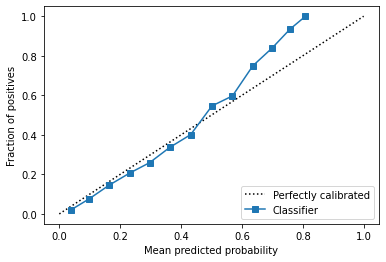

In [111]:
CalibrationDisplay.from_predictions(y_test.replace(2, 0).replace(3, 0), 
                                    pd.DataFrame(pipe.predict_proba(X_pol_test)[:, :1]),
                                    n_bins=15)

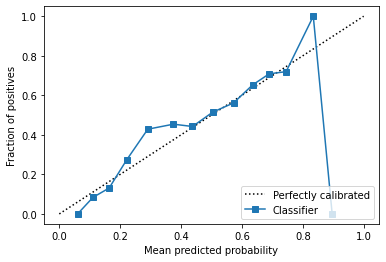

In [112]:
CalibrationDisplay.from_predictions(y_test.replace(1, 0).replace(3, 0).replace(2, 1), 
                                    pd.DataFrame(pipe.predict_proba(X_pol_test)[:, 1:2]),
                                    n_bins=15)

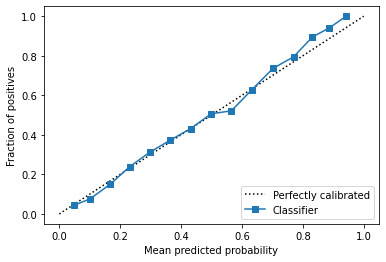

In [113]:
CalibrationDisplay.from_predictions(y_test.replace(1, 0).replace(2, 0).replace(3, 1), 
                                    pd.DataFrame(pipe.predict_proba(X_pol_test)[:, 2:3]),
                                    n_bins=15)

**Задание 3.** Обучите на датасете без полиномиальных признаков One-vs-One `SGDClassifier` из `sklearn.linear_model`, который использует стохастический градиентный спуск (узнаете о нем позже) и может обучать как `SVM`, так и, например, `LogReg`, если указать в качестве параметра `loss` либо `hinge`, либо `log` соответственно!

Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg.

In [131]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

In [132]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

pipe = Pipeline([('scaler', StandardScaler()), ('one_vs_one', OneVsOneClassifier(estimator=SGDClassifier(loss='hinge')))])
pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_one', OneVsOneClassifier(estimator=SGDClassifier()))])

In [133]:
print(classification_report(y_test, pipe.predict(X_test), target_names=['1', '2', '3'], digits=3))

              precision    recall  f1-score   support

           1      0.749     0.522     0.615      5372
           2      0.624     0.875     0.729     11349
           3      0.763     0.531     0.626      9612

    accuracy                          0.677     26333
   macro avg      0.712     0.643     0.657     26333
weighted avg      0.700     0.677     0.668     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()`. При этом переберите всевозможные функции потерь. Таким образом, при `loss = 'hinge'`, мы обучим SVM, при `loss = 'log'` мы обучим логистическую регрессию и т.д.

Используйте прием с Кросс-Валидацией при подборе параметров, как ранее, а также замерьте метрики на тесте.

In [134]:
param_grid = {'one_vs_one__estimator__loss': ['hinge', 'log', 'modified_huber'],
              'one_vs_one__estimator__penalty': ['l1', 'l2'],
              'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1]}

In [135]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(pipe, param_grid)

In [136]:
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('one_vs_one',
                                        OneVsOneClassifier(estimator=SGDClassifier()))]),
             param_grid={'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1],
                         'one_vs_one__estimator__loss': ['hinge', 'log',
                                                         'modified_huber'],
                         'one_vs_one__estimator__penalty': ['l1', 'l2']})

In [137]:
search.best_params_

{'one_vs_one__estimator__alpha': 0.1,
 'one_vs_one__estimator__loss': 'modified_huber',
 'one_vs_one__estimator__penalty': 'l2'}

In [138]:
pipe = Pipeline([('scaler', StandardScaler()), ('one_vs_one', OneVsOneClassifier(
    estimator=SGDClassifier(
        loss='modified_huber',
        alpha=0.1,
        penalty='l2'
    )))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_one',
                 OneVsOneClassifier(estimator=SGDClassifier(alpha=0.1,
                                                            loss='modified_huber')))])

In [139]:
print(classification_report(y_test, pipe.predict(X_test), target_names=['1', '2', '3'], digits=3))

              precision    recall  f1-score   support

           1      0.745     0.531     0.620      5372
           2      0.632     0.849     0.724     11349
           3      0.748     0.565     0.644      9612

    accuracy                          0.680     26333
   macro avg      0.708     0.648     0.663     26333
weighted avg      0.697     0.680     0.674     26333



Можно ли однозначно сказать, какой подход оказался лучше: One-vs-Rest или One-vs-One?